In [1]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [2]:
def default_pars( **kwargs):
    pars = {}
    
    pars['snr']    = 0.08 #Source of resting phagocytes
    pars['unr']    = 0.12 #Decay rate of resting phagocytes

    pars['kpn']    = 1.8 #Rate at which activated phagocytes (N*) consume pathogen
    pars['knp']    = 0.1 # Activation of resting phagocytes (NR) by pathogen
    pars['knn']    = 0.01 # Activation of resting phagocytes by previously activated phagocytes and their cytokines
    pars['un']    = 0.05 #Decay rate of activated phagocytes
    
    
    ### simulation parameters ###
    pars['T'] = 100. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [3]:
def run_phagoctye_model(pars,Nact,P):
    
        # Set parameters
    snr = pars['snr']
    unr = pars['unr']
    
#     kpn = pars['kpn']    
    knp = pars['knp']    
    knn = pars['knn']
    
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    NR = np.zeros(Lt) # non-specific local response levels
    
    NR[0]= 0    
    
    for it in range(Lt-1):                
        R1 = knn* Nact + knp*P
        
        dNR = (snr-unr *NR[it] - R1*NR[it] )* dt

        #update
        NR[it+1] = NR[it] + dNR
    return(NR)

0.34782608692859424

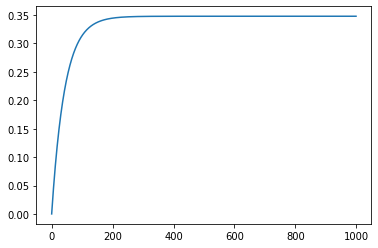

In [4]:
pars = default_pars()
Nact=1
P=1
NR =run_phagoctye_model(pars,Nact,P)
plt.plot(NR)
NR[-1]

In [5]:

def NR_steady_state(pars,Nact,P):
    snr = pars['snr']   
    unr = pars['unr']
    knp = pars['knp']    
    knn = pars['knn']    
    
    R1 = knn* Nact + knp*P
    NR = snr/(unr+R1)
    return(NR)

In [6]:
pars = default_pars()
Nact=1
P=1
NR_steady_state(pars,Nact,P)

0.3478260869565218